In [83]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets, layers, models


(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.

tf.random.set_seed(123)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [85]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])
model.fit(train_images, train_labels)


1875/1875 [==============================] - 3s 2ms/step - loss: 0.3930 - acc: 0.8909


### 필터확인해보기

In [93]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d_23')>,
 <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d_15')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_24')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_16')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'conv2d_25')>,
 <KerasTensor: shape=(None, 576) dtype=float32 (created by layer 'flatten_5')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_10')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_11')>]

Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
None


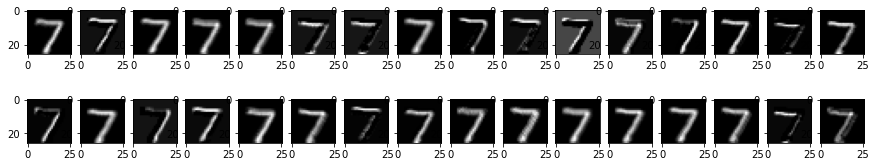

In [137]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[0])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(32)):
    plt.subplot(2,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')

Model: "model_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
None


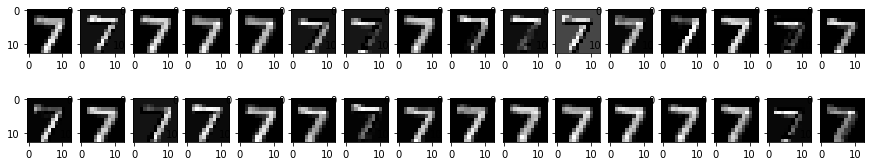

In [139]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[1])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(32)):     #여기까지
    plt.subplot(2,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')

Model: "model_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________
None


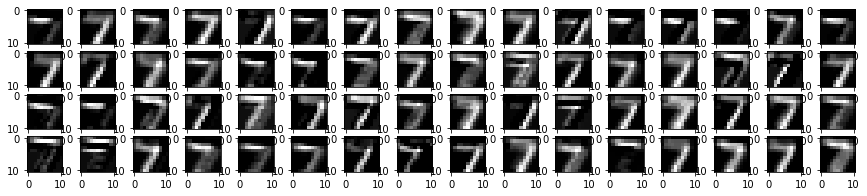

In [140]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[2])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(64)):
    plt.subplot(4,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')

Model: "model_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________
None


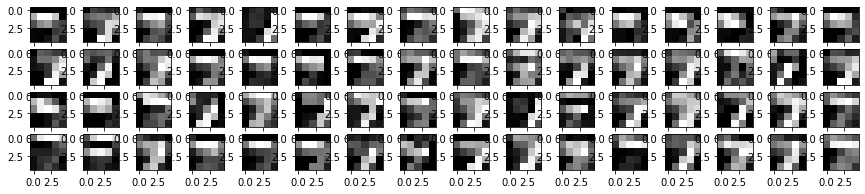

In [141]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[3])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(64)):
    plt.subplot(4,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')

Model: "model_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
______________________________________________________

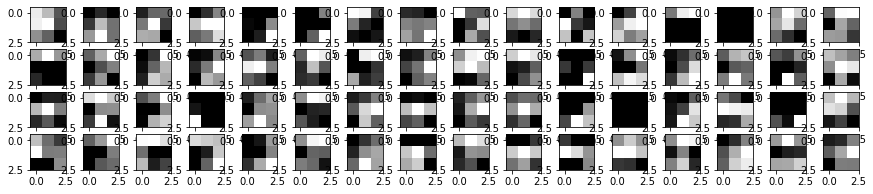

In [142]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[4])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(64)):
    plt.subplot(4,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')